In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

$\textbf{Q-1}$

In [2]:
# Load data
t, Y = np.loadtxt('Motorcycledata.txt', unpack=True, usecols=[1,2])
print t.shape, Y.shape

# Choose unique indexes, and calcule the mean value
t, idx, m = np.unique(t, return_inverse=True, return_counts=True)
Y = np.array([np.mean(Y[idx == i]) for i in range(len(t))])
w = np.array([cnt*1.0/m.sum() for cnt in m])

print t.shape, Y.shape, m.sum()

(133,) (133,)
(94,) (94,) 133


$\textbf{Q-2}$

Degree = 3, done in 0.004s.
Degree = 5, done in 0.003s.
Degree = 6, done in 0.004s.


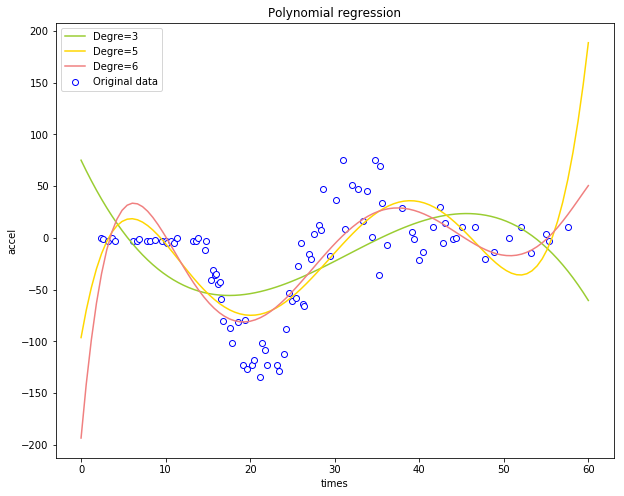

In [3]:
from time import time

# Original data
plt.close('all')
plt.figure(1, figsize=(10, 8))
plt.title('Polynomial regression')
plt.xlabel("times")
plt.ylabel("accel")
plt.scatter(t, Y, c='w', edgecolors='b', label='Original data')

# Do polynomial regression and draw figures
cols = ['yellowgreen', 'gold', 'lightcoral']
degres = [3, 5, 6]
for i in range(len(degres)):
    t0 = time()
    d = degres[i]
    poly = PolynomialFeatures(degree=d)
    t_new = poly.fit_transform(t.reshape(-1, 1))
    regr = linear_model.LinearRegression()
    regr.fit(t_new, Y)
    #plt.plot(t, regr.predict(t_new))
    X = np.linspace(0, 60, 100)
    plt.plot(X, regr.predict(poly.transform(X.reshape(-1, 1))), c=cols[i], label="Degre=%d" % d)
    print "Degree = %d, done in %0.3fs." % (d, time()-t0)

plt.legend()
plt.show()


$\textbf{Q-3}$

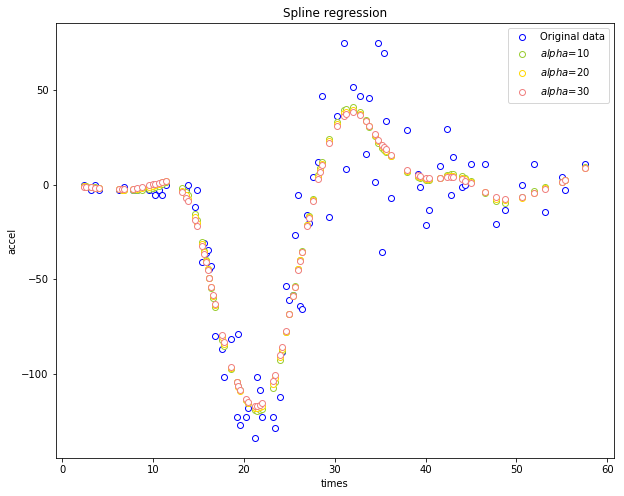

In [4]:
# Get intervals
h = np.array([t[i+1]-t[i] for i in range(len(t)-1)])

# Calcule the matrix Q and R
n = len(t)
Q = np.zeros((n, n-2))
R = np.zeros((n-2, n-2))

for j in range(1, n-1):
    Q[j-1][j-1] = 1.0/h[j-1]
    Q[j][j-1] = - 1.0/h[j-1] - 1.0/h[j]
    Q[j+1][j-1] = 1.0/h[j]   
#print Q != 0

for i in range(n-2):
    R[i][i] = (h[i]+h[i+1]) / 3
for i in range(n-3):
    R[i][i+1] = R[i+1][i] = h[i+1]
#print R != 0

K = Q.dot(np.linalg.solve(R, np.identity(n-2))).dot(Q.T)
#print K

def spline(alpha):
    return np.linalg.solve((np.diag(m) + alpha*K), np.diag(m).dot(Y))

# Original data
plt.close("all")
plt.figure(2, figsize=(10, 8))
plt.title('Spline regression')
plt.xlabel("times")
plt.ylabel("accel")
plt.scatter(t, Y, c='w', edgecolors='b', label="Original data")

col = ['yellowgreen', 'gold', 'lightcoral']
alphas = [10, 20, 30]
for i in range(len(alphas)):
    g = spline(alphas[i])
    plt.scatter(t, g, c='w', edgecolors=col[i], label="$alpha$=%d" % alphas[i])
plt.legend()
plt.show()

$\textbf{Q-4}$

The best alpha is 41.
Done in 0.094s.


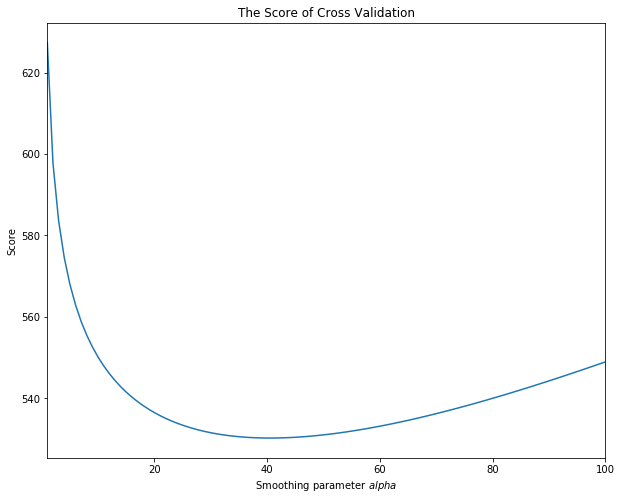

In [5]:
def CV(alpha):
    g_chapeau = spline(alpha)
    A_w = np.linalg.solve((np.diag(m) + alpha*K), np.diag(m))
    score = np.array([m[i]*(((Y[i]-g_chapeau[i])/(1-A_w[i][i]))**2) for i in range(n)]).mean()
    return score

t0 = time()
alpha_max = 100
alphas = range(1, alpha_max+1)
score_cv = []
for alpha in alphas:
    score_cv.append(CV(alpha))

print "The best alpha is %d." % alphas[np.argmin(score_cv)]
print "Done in %0.3fs." % (time()-t0)

plt.close()
plt.figure(3, figsize=(10,8))
plt.title("The Score of Cross Validation")
plt.xlabel("Smoothing parameter $alpha$")
plt.ylabel("Score")
plt.xlim(1, 100)
plt.plot(alphas, score_cv)
plt.show()

$\textbf{Q-5}$

The best alpha is 44.
Done in 0.078s.


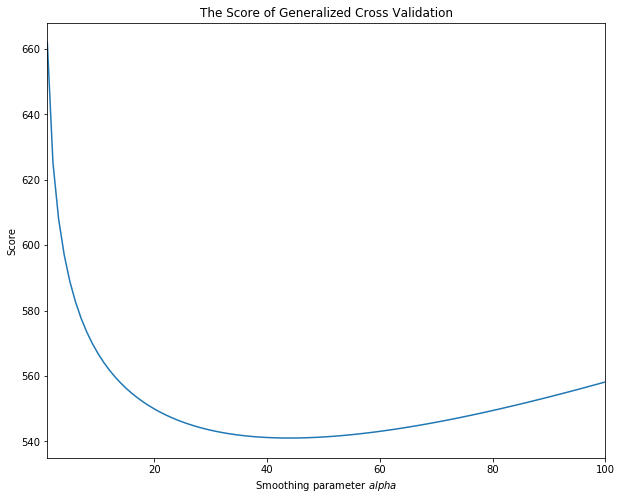

In [6]:
def GCV(alpha):
    g_chapeau = spline(alpha)
    A_w = np.linalg.solve((np.diag(m) + alpha*K), np.diag(m))
    score = np.array([m[i]*((Y[i]-g_chapeau[i])**2) for i in range(n)]).mean() / (1 - np.trace(A_w)/n)**2
    return score

t0 = time()
score_gcv = []
for alpha in alphas:
    score_gcv.append(GCV(alpha))

print "The best alpha is %d." % alphas[np.argmin(score_gcv)]
print "Done in %0.3fs." % (time()-t0)

plt.close()
plt.figure(4, figsize=(10,8))
plt.title("The Score of Generalized Cross Validation")
plt.xlabel("Smoothing parameter $alpha$")
plt.ylabel("Score")
plt.xlim(1, 100)
plt.plot(alphas, score_gcv)
plt.show()

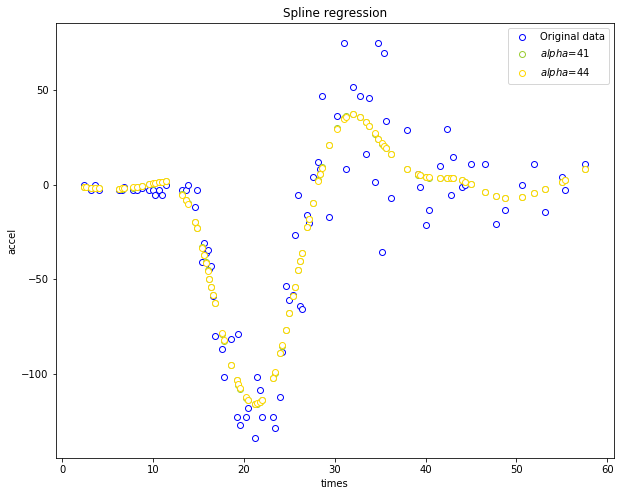

In [9]:
# Original data
plt.close("all")
plt.figure(5, figsize=(10, 8))
plt.title('Spline regression')
plt.xlabel("times")
plt.ylabel("accel")
plt.scatter(t, Y, c='w', edgecolors='b', label="Original data")

col = ['yellowgreen', 'gold', 'lightcoral']
alphas = [41, 44]
for i in range(len(alphas)):
    g = spline(alphas[i])
    plt.scatter(t, g, c='w', edgecolors=col[i], label="$alpha$=%d" % alphas[i])
plt.legend()
plt.show()